# CROQUIS
### 1. Analizar los datos del dataset, plantear correlacion entre variables, dependencias, causalidades y patrones, entre otras. Emplear graficos de distintos tipos para lograr insights.
### 2. Seleccionar un subconjunto del total del analisis de relaciones o patrones que parecen presentar mayor peso al momento de categorizar y dividir/diferenciar el conjunto de personas en grupos bien definidos.
### 3. A partir de los resultados relevantes, elaborar hipotesis/conjeturas sobre el comportamiento a futuro (en este caso, si van a ver o no Frozen 4).
### 4. Elaborar un programa LOGICO basico en Python (baseline) que permita discriminar aquellos usuarios que, a partir de ciertas caracteristicas en comun, sean considerados como candidatos a ver Frozen 4.

# FEATURES 
- **volvera**: (variable target) entero que representa 0: no volvería, 1: si volvería
- **tipo_de_sala**: El tipo de la sala (2d, 3d, 4d) [2d: sala común, 3d: sala 3D, 4d: sala 4D]
- **genero**: género con el cual el usuario se identifica en la encuesta
- **edad**: edad del usuario que completa la encuesta
- **amigos**: cantidad de amigos con los que fue a ver la película (Frozen 3)
- **parientes**: cantidad de familiares con los que fue a ver la película (Frozen 3)
- **ticket**: código del ticket
- **precio**: precio pagado por el ticket, en franjas de valor ordenadas de 1 a 50
- **fila**: fila dentro de la sala
- **cine**: nombre del cine [FiuMark tiene varias sedes]
- **nombre**: nombre del usuario que completa la encuesta

# FECHAS CLAVES
- **Entrega del notebook**: Miércoles 28 de octubre.
- **Defensa oral del tp**: Martes 3 de noviembre.

# SECTION 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### GENERAL OVERVIEW

In [2]:
train_df_values = pd.read_csv('Data/tp-2020-2c-train-cols1.csv')

In [3]:
train_df_values.head()

,Unnamed: 0,id_usuario,volveria
0,116,117,0
1,657,658,0
2,793,794,0
3,454,455,0
4,172,173,1


In [4]:
train_df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  801 non-null    int64
 1   id_usuario  801 non-null    int64
 2   volveria    801 non-null    int64
dtypes: int64(3)
memory usage: 18.9 KB


In [5]:
train_df_values.describe()

,Unnamed: 0,id_usuario,volveria
count,801.000000,801.000000,801.000000
mean,448.701623,449.701623,0.383271
std,257.192277,257.192277,0.486487
min,0.000000,1.000000,0.000000
25%,228.000000,229.000000,0.000000
50%,451.000000,452.000000,0.000000
75%,672.000000,673.000000,1.000000
max,890.000000,891.000000,1.000000


In [6]:
train_df_values.isnull().values.any()

False

In [7]:
train_df_features = pd.read_csv('Data/tp-2020-2c-train-cols2.csv')

In [8]:
train_df_features.head()

,Unnamed: 0,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,116,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,657,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,793,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,454,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,172,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo


In [9]:
train_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     801 non-null    int64  
 1   tipo_de_sala   801 non-null    object 
 2   nombre         801 non-null    object 
 3   id_usuario     801 non-null    int64  
 4   genero         801 non-null    object 
 5   edad           641 non-null    float64
 6   amigos         801 non-null    int64  
 7   parientes      801 non-null    int64  
 8   id_ticket      801 non-null    object 
 9   precio_ticket  801 non-null    int64  
 10  fila           177 non-null    object 
 11  nombre_sede    799 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 75.2+ KB


In [10]:
train_df_features.describe()

,Unnamed: 0,id_usuario,edad,amigos,parientes,precio_ticket
count,801.000000,801.000000,641.000000,801.000000,801.000000,801.000000
mean,448.701623,449.701623,32.688378,0.504370,0.383271,3.453184
std,257.192277,257.192277,14.380672,1.089859,0.804158,4.629592
min,0.000000,1.000000,3.420000,0.000000,0.000000,1.000000
25%,228.000000,229.000000,23.000000,0.000000,0.000000,1.000000
50%,451.000000,452.000000,31.000000,0.000000,0.000000,2.000000
75%,672.000000,673.000000,41.000000,1.000000,0.000000,3.000000
max,890.000000,891.000000,83.000000,8.000000,6.000000,50.000000


In [11]:
train_df_features.isnull().values.any()

True

### NaN value analysis

In [12]:
df_NaN_Values = train_df_features.drop('Unnamed: 0', axis = 1)
df_NaN_Values = df_NaN_Values.isnull().mean() * 100

In [13]:
df_NaN_Values

tipo_de_sala      0.000000
nombre            0.000000
id_usuario        0.000000
genero            0.000000
edad             19.975031
amigos            0.000000
parientes         0.000000
id_ticket         0.000000
precio_ticket     0.000000
fila             77.902622
nombre_sede       0.249688
dtype: float64

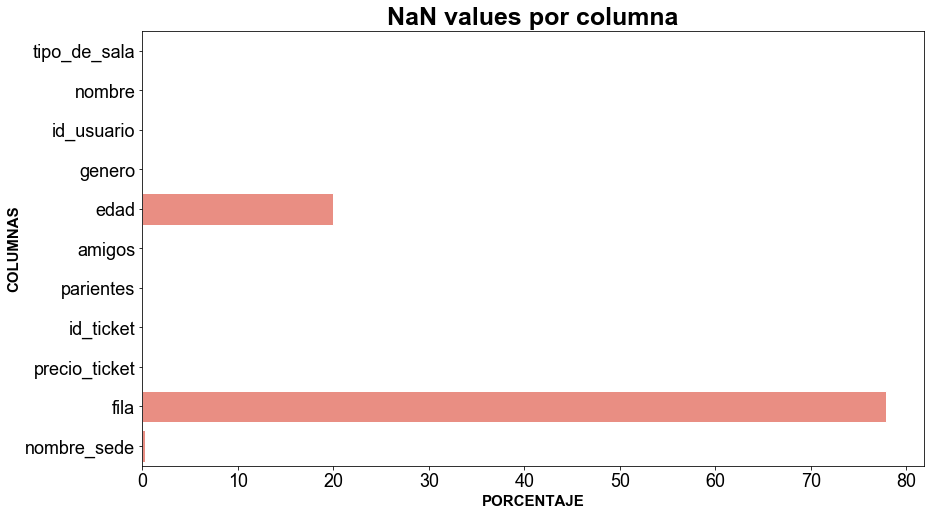

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_color_codes("pastel")
sns.set_style("darkgrid")
plt.title("NaN values por columna", fontweight = "bold", fontsize=25)
sns.barplot(x = df_NaN_Values, y = df_NaN_Values.index, color="salmon")
ax.set_xlabel('PORCENTAJE',fontsize=15, fontweight = "semibold");
ax.set_ylabel('COLUMNAS',fontsize=15, fontweight = "semibold");
ax.tick_params(labelsize=18)

Se puede apreciar que casi el 80% de los valores de la columna **fila** son nulos. Esto implica que cualquier informacion que se pueda obtener a partir de dicha columna no refleja la informacion que contiene el total del dataset. De modo que, cualquier conclusion a la que se arribara a partir de la columna FILA sera tomada con cautela.
En lo que respecta a la columna **edad**, si bien el porcentaje de datos nulos es considerable (alrededor de 20%), en relacion al total del set, podemos considerar que aquellas conclusiones que se obtienen a partir de la misma tendran relevancia al momento de generar *insight* sobre el total del dataset. Sin embargo, no se debe olvidar que lo que se puede concluir a partir de esta columna no refleja el total del dataset, sino un 80% del mismo.
Finalmente, el campo **nombre_sede** no contiene una cantidad significativa de valores nulos por lo que cualquier *insigth*  que se obtenga a partir de la misma seran considerados como de igual peso que aquellas columnas que no tienen valores nulos.

### Analisis de features y target

In [15]:
# Preparacion del df
train_df_features_aux = train_df_features.drop('Unnamed: 0', axis = 1)
train_df_values_aux = train_df_values.drop('Unnamed: 0', axis = 1)
df_features_target = pd.merge(train_df_features_aux,train_df_values_aux, on = 'id_usuario')
df_features_target

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes,1


**SEGMENTO: COLUMNA GENERO**

In [16]:
df_genero_vs_target = pd.crosstab(df_features_target['genero'],df_features_target['volveria']).reset_index()
df_genero_vs_target['total'] = df_genero_vs_target [0] + df_genero_vs_target [1]
df_genero_vs_target

volveria,genero,0,1,total
0,hombre,419,94,513
1,mujer,75,213,288


In [17]:
# Convertimos valores a porcentajes
df_genero_vs_target ['no_percentage'] = (df_genero_vs_target [0])*100/(df_genero_vs_target['total'])
df_genero_vs_target ['yes_percentage'] = (df_genero_vs_target [1])*100/(df_genero_vs_target['total'])
df_genero_vs_target ['total_percentage']=100
del df_genero_vs_target[0]
del df_genero_vs_target[1]
del df_genero_vs_target['total']
df_genero_vs_target

volveria,genero,no_percentage,yes_percentage,total_percentage
0,hombre,81.676413,18.323587,100
1,mujer,26.041667,73.958333,100


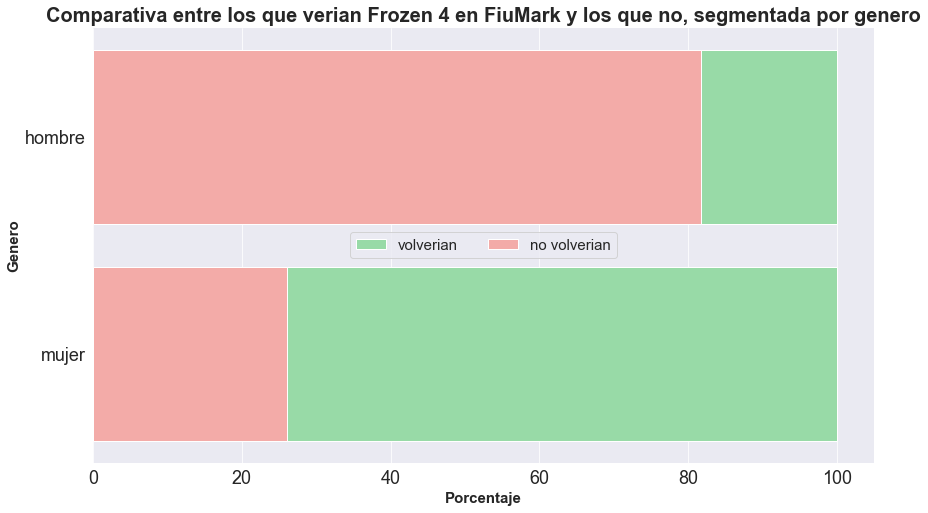

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'total_percentage', y = 'genero', data = df_genero_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'no_percentage', y = 'genero', data = df_genero_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Porcentaje', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Genero', fontweight = 'semibold', fontsize = 15)
plt.title ('Comparativa entre los que verian Frozen 4 en FiuMark y los que no, segmentada por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

La grafica revela que el porcentaje de mujeres que volverian a alguno de los cines de FiuMark supera ampliamente el porcentaje de los hombres, de modo que, de realizarse algun tipo de campana que promocione Forzen 4, debe considerarse que el publico femenino probablemente sea el mas receptivo.

Podemos analizar la misma informacion desde otro angulo: es este caso podriamos ver la proporcion de hombres vs la proporcion de mujeres que  volverian (o no) a alguno de los cines de FiuMark

In [19]:
df_genero_and_target = df_features_target.copy()
df_genero_and_target

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
796,normal,Señor Bernardo Melesio,448,hombre,37.0,0,0,3359;6,3,NaN,fiumark_palermo,1
797,3d,Señorita Lidia Catalina,636,mujer,31.0,0,0,45988:,2,NaN,fiumark_palermo,1
798,4d,Señor Arturo Antenor,848,hombre,38.0,0,0,56;435,1,NaN,fiumark_chacarita,0
799,3d,Señorita Natividad Sofia,304,mujer,NaN,0,0,4487;5,2,adelante,fiumark_quilmes,1


In [20]:
df_genero_and_target = pd.crosstab(df_features_target['volveria'],df_features_target['genero']).reset_index()
df_genero_and_target['volveria'] = df_genero_and_target['volveria'].map({0: 'no volveria', 1: 'volveria'})
df_genero_and_target = df_genero_and_target.set_index('volveria')
df_genero_and_target

genero,hombre,mujer
volveria,,
no volveria,419,75
volveria,94,213


In [21]:
#convertimos a porcentajes
df_genero_and_target_porcentual= df_genero_and_target.div(df_genero_and_target.sum(axis=1), axis=0)
df_genero_and_target_porcentual

genero,hombre,mujer
volveria,,
no volveria,0.848178,0.151822
volveria,0.306189,0.693811


In [22]:
#separamos la informacion por fila para crear los graficos asociados
df_genero_and_target_porcentual_no_volverian = df_genero_and_target_porcentual.iloc[0,:]
df_genero_and_target_porcentual_no_volverian
df_genero_and_target_porcentual_volverian = df_genero_and_target_porcentual.iloc[1,:]
df_genero_and_target_porcentual_volverian

genero
hombre    0.306189
mujer     0.693811
Name: volveria, dtype: float64

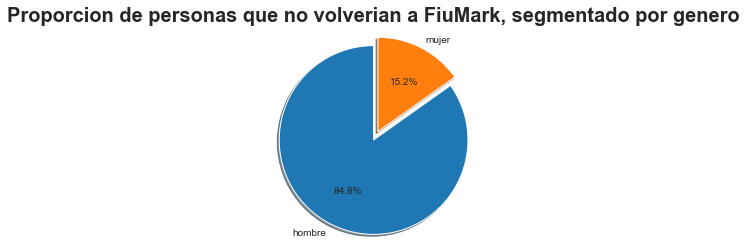

In [23]:
labels = 'hombre', 'mujer'
sns.set_color_codes("pastel")
sizes = [df_genero_and_target_porcentual.iloc[0,0], df_genero_and_target_porcentual.iloc[0,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporcion de personas que no volverian a FiuMark, segmentado por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

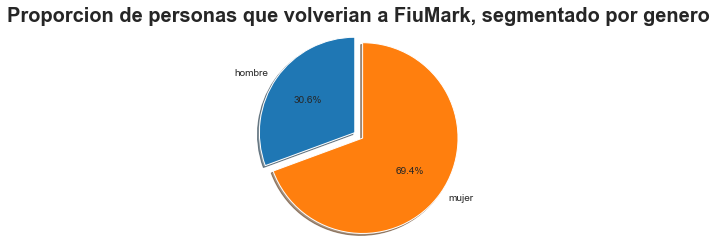

In [24]:
labels = 'hombre', 'mujer'
sns.set_color_codes("pastel")
sizes = [df_genero_and_target_porcentual.iloc[1,0], df_genero_and_target_porcentual.iloc[1,1]]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporcion de personas que volverian a FiuMark, segmentado por genero', fontweight = 'semibold', fontsize = 20)
plt.show()

Como se puede observar, el mayor porcentaje de personas que volverian a un cine FiuMark a ver Frozen 4 corresponde a las mujeres. por otro lado, los hombres no tienen intencion de volver a uno de estos cines a ver Frozen 4. Una observacion interesante es que el criterio para decidir quienes no volverian es mas fuerte que el criterio para decidir quienes si volverian, pues la diferencia porcentual entre los generos es mayor en el primer caso.

**SEGMENTO: COLUMNA AMIGOS**

In [25]:
df_amigos_vs_target = pd.crosstab(df_features_target['amigos'],df_features_target['volveria']).reset_index()
df_amigos_vs_target['total'] = df_amigos_vs_target [0] + df_amigos_vs_target [1]
df_amigos_vs_target

volveria,amigos,0,1,total
0,0,363,194,557
1,1,84,95,179
2,2,12,13,25
3,3,11,3,14
4,4,13,2,15
5,5,5,0,5
6,8,6,0,6


In [26]:
# Convertimos valores a porcentajes
df_amigos_vs_target ['no_percentage'] = (df_amigos_vs_target [0])*100/(df_amigos_vs_target['total'])
df_amigos_vs_target ['yes_percentage'] = (df_amigos_vs_target [1])*100/(df_amigos_vs_target['total'])
df_amigos_vs_target ['total_percentage']=100
del df_amigos_vs_target[0]
del df_amigos_vs_target[1]
del df_amigos_vs_target['total']
df_amigos_vs_target

volveria,amigos,no_percentage,yes_percentage,total_percentage
0,0,65.170557,34.829443,100
1,1,46.927374,53.072626,100
2,2,48.000000,52.000000,100
3,3,78.571429,21.428571,100
4,4,86.666667,13.333333,100
5,5,100.000000,0.000000,100
6,8,100.000000,0.000000,100


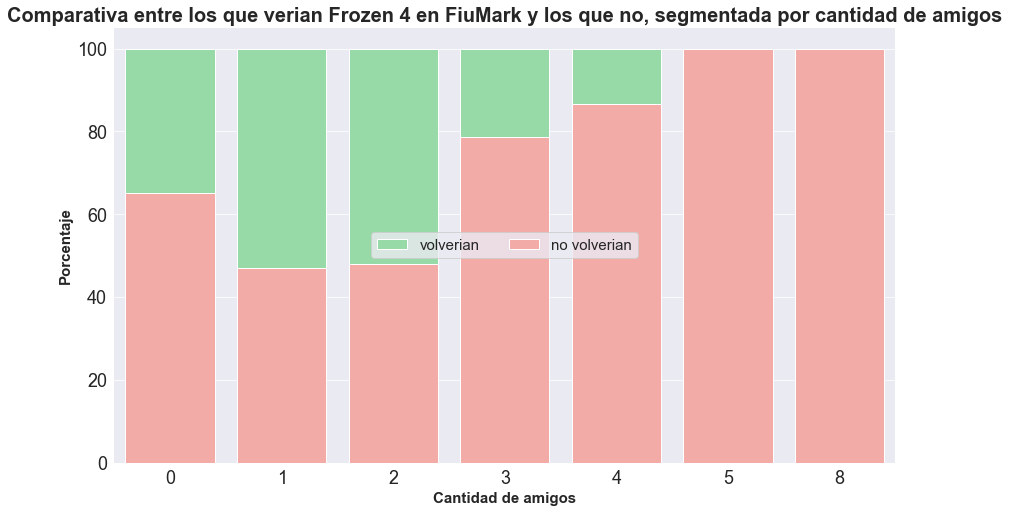

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'amigos', y = 'total_percentage', data = df_amigos_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'amigos', y = 'no_percentage', data = df_amigos_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Cantidad de amigos', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Porcentaje', fontweight = 'semibold', fontsize = 15)
plt.title ('Comparativa entre los que verian Frozen 4 en FiuMark y los que no, segmentada por cantidad de amigos', fontweight = 'semibold', fontsize = 20)
plt.show()

El diagrama de barras muestra claramente como aquellas personas que fueron a alguno de los cines de FiuMark en grupos numerosos (esto es, de 4 en adelante) son menos propensos a volver a uno de estos cines a ver Frozen 4. Por otro lado, para las personas que fueron solas o con no mas de 2 personas, la intencion de volver corresponde a la mitad. Una explicacion a este fenomeno puede ser que aquellos que van al cine en grupos numerosos lo hacen como salida de caracter social, independientemente de la pelicula que se vaya a proyectar o el cine al que asisten. De este modo, la intencion de volver a uno de los cines de FiuMark a ver una pelicula en especifico se mantiene muy baja, pues el objetivo de dicha salida grupal es mas de caracter social (lo que implica que tanto una salida al cine, una juntada en una cerveceria o salir a un boliche resulta indiferente al grupo). 
Un comentario mas sobre la grafica. A partir de estos datos, el *feature* con mas fuerza, esto es, el que se puede usar para discriminar y obtener conclusiones robustas sobre quienen asistirian o no a un cine de FiuMark para ver Frozen 4, corresponde a los valores mayores a 3 amigos. En este caso, saber que una persona asistio a un cine con 3 o mas amigos puede ayudar a la firma a no considerar a estas personas como audiencia candidata para Frozen 4. Por otro lado, la informacion que brindan aquellas personas que asistieron solas o con menos de 3 amigos no resulta util pues se puede ver que la mitad de estas personas indicaron que volverian y la otra mitad (aproximadamente) indico que no. De modo que si, por ejemplo, una persona asitio sola, hay aproximadamente un 50% de probabilidad de que vuelva (en un espacio de probabilidad Laplaciano), lo cual no aporta informacion de interes para una campana publicitaria, por ejemplo (es decir, la variable "0 amigos" no permite concluir si volvera o no, el *insight* que aporta no es distinto al que aporta arrojar una moneda).

**SEGMENTO: COLUMNA PARIENTES**

In [28]:
df_parientes_vs_target = pd.crosstab(df_features_target['parientes'],df_features_target['volveria']).reset_index()
df_parientes_vs_target['total'] = df_parientes_vs_target [0] + df_parientes_vs_target [1]
df_parientes_vs_target

volveria,parientes,0,1,total
0,0,398,209,607
1,1,50,60,110
2,2,36,34,70
3,3,2,3,5
4,4,4,0,4
5,5,3,1,4
6,6,1,0,1


In [29]:
# Convertimos valores a porcentajes
df_parientes_vs_target ['no_percentage'] = (df_parientes_vs_target [0])*100/(df_parientes_vs_target['total'])
df_parientes_vs_target ['yes_percentage'] = (df_parientes_vs_target [1])*100/(df_parientes_vs_target['total'])
df_parientes_vs_target ['total_percentage']=100
del df_parientes_vs_target[0]
del df_parientes_vs_target[1]
del df_parientes_vs_target['total']
df_parientes_vs_target

volveria,parientes,no_percentage,yes_percentage,total_percentage
0,0,65.568369,34.431631,100
1,1,45.454545,54.545455,100
2,2,51.428571,48.571429,100
3,3,40.000000,60.000000,100
4,4,100.000000,0.000000,100
5,5,75.000000,25.000000,100
6,6,100.000000,0.000000,100


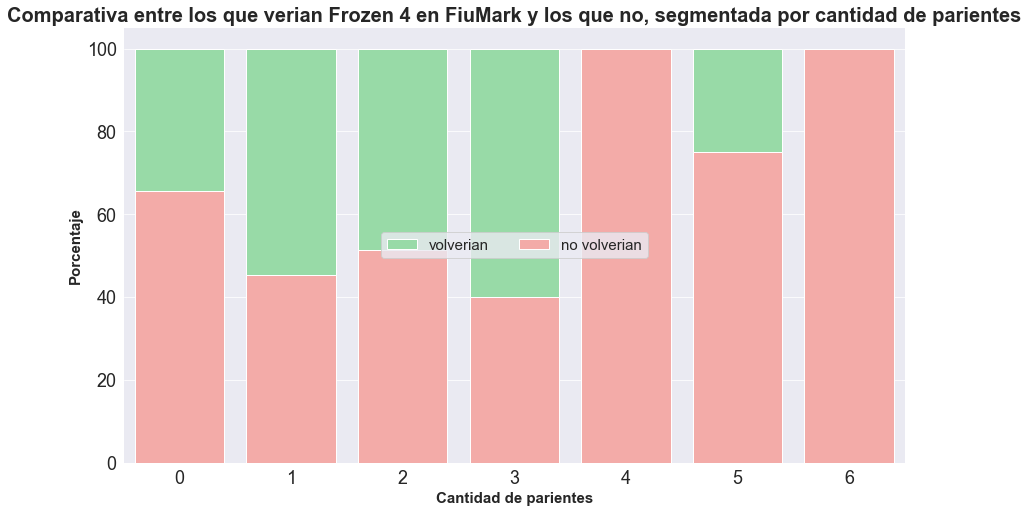

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'parientes', y = 'total_percentage', data = df_parientes_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'parientes', y = 'no_percentage', data = df_parientes_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Cantidad de parientes', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Porcentaje', fontweight = 'semibold', fontsize = 15)
plt.title ('Comparativa entre los que verian Frozen 4 en FiuMark y los que no, segmentada por cantidad de parientes', fontweight = 'semibold', fontsize = 20)
plt.show()

Un comentario necesario sobre este analisis y el referido a la segmentacion por cantidad de amigos es que, si bien estos grupos estan bien diferenciados (amigos y parientes son grupos distintos) es dificil discriminar correctamente al momento de responder la pregunta "con quien asististe al cine?" porque puede ocurrir el caso de que en un grupo (especialmente si el grupo es numeroso) amigos y parientes esten mezclados. Mas alla de este comentario, las conclusiones a las que se arribaron en el caso de la segmentacion por grupo de amigos es similar a esta: los grupos grandes son los menos inclinados a volver a FiuMark a ver Frozen 4. La informacion que aportan los asistentes con 4 o 6 mimebros familiares es determinante: ninguno de los encuestados volveria. Adicionalmente a la explicacion provista en el analisis anterior, tambien podria ocurrir que las instalaciones de FiuMark tengan alguna caracteristica que no permite que los grupos numerosos se sientan comodos y a gusto. 

**SEGMENTO: COLUMNA NOMBRE_SEDE**

In [31]:
df_nombre_sede_vs_target = pd.crosstab(df_features_target['nombre_sede'],df_features_target['volveria']).reset_index()
df_nombre_sede_vs_target['total'] = df_nombre_sede_vs_target [0] + df_nombre_sede_vs_target [1]
df_nombre_sede_vs_target

volveria,nombre_sede,0,1,total
0,fiumark_chacarita,66,83,149
1,fiumark_palermo,384,195,579
2,fiumark_quilmes,44,27,71


In [32]:
# Convertimos valores a porcentajes
df_nombre_sede_vs_target ['no_percentage'] = (df_nombre_sede_vs_target [0])*100/(df_nombre_sede_vs_target['total'])
df_nombre_sede_vs_target ['yes_percentage'] = (df_nombre_sede_vs_target [1])*100/(df_nombre_sede_vs_target['total'])
df_nombre_sede_vs_target ['total_percentage']=100
del df_nombre_sede_vs_target[0]
del df_nombre_sede_vs_target[1]
del df_nombre_sede_vs_target['total']
df_nombre_sede_vs_target

volveria,nombre_sede,no_percentage,yes_percentage,total_percentage
0,fiumark_chacarita,44.295302,55.704698,100
1,fiumark_palermo,66.321244,33.678756,100
2,fiumark_quilmes,61.971831,38.028169,100


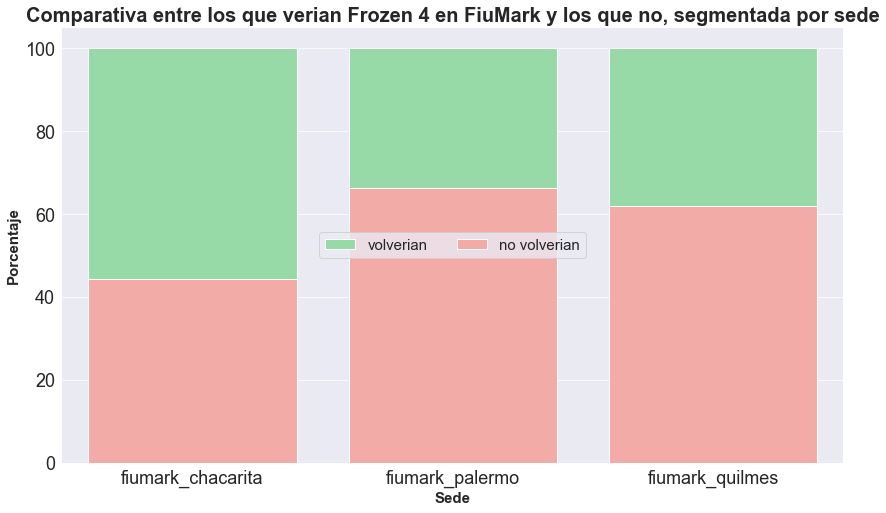

In [33]:
sns.set_style('darkgrid')
plt.figure(figsize = (14, 8))
sns.set_color_codes("pastel")
sns.barplot(x = 'nombre_sede', y = 'total_percentage', data = df_nombre_sede_vs_target, color = 'g', label = 'volverian')
sns.barplot(x = 'nombre_sede', y = 'no_percentage', data = df_nombre_sede_vs_target, color = 'r', label = 'no volverian')
plt.tick_params(labelsize=18)

plt.legend(ncol=2, loc="center", frameon=True, fontsize = 15)

sns.despine(left = True, bottom = True)
plt.xlabel ('Sede', fontweight = 'semibold', fontsize = 15)
plt.ylabel ('Porcentaje', fontweight = 'semibold', fontsize = 15)
plt.title ('Comparativa entre los que verian Frozen 4 en FiuMark y los que no, segmentada por sede', fontweight = 'semibold', fontsize = 20)
plt.show()

En este caso, el criterio para discriminar por sede es bastante parejo. Aparentemente las diferencias entre las instalaciones y la comodidad y el confort que aportan no son significativas, lo cual puede deducirse de la cercania entre los porcentajes de los 3 complejos. Hay que destacar, sin embargo, que la sede de Palermo es la que menos reincidencia del publico experimentaria en caso de cumplirse las encuestas. Por otro lado, aquellos asistentes al FiuMark de Chacarita son los mas dispuestos a volver al complejo a ver Frozen 4.
Un dato interesante tiene que ver con la cantidad de encuestados por complejo. Mientras que el total de encuestados en el FiuMark de Palermo fue de 579 personas, en Chacarita se encuestaron solo 149, lo que implica una diferencia porcentual de 400%. Esto quiere decir que se encuestaron mas personas en Palermo que en Chacarita, a razon de 4 a 1. Por que es esta informacion no menor? Como sabemos, por la Ley de los Grandes Numeros de estadistica, cuando la muestra (en este caso la cantidad de encuestados) es lo suficientemente grande, los resultados obtenidos converjen al valor promedio, que, en este caso, es el que refleja la "realidad" sobre la intencion de asistencia a ver Frozen 4. De modo que si bien los porcentajes obtenidos son correctos, los datos obtenidos en Palermo reflejan mejor la "realidad" sobre la intecion de volver a FiuMark a ver Frozen 4.

**SEGMENTO: COLUMNA PRECIO_TICKET**

In [34]:
df_precio_ticket_vs_target = pd.crosstab(df_features_target['precio_ticket'],df_features_target['volveria']).reset_index()
df_precio_ticket_vs_target['total'] = df_precio_ticket_vs_target [0] + df_precio_ticket_vs_target [1]
df_precio_ticket_vs_target.columns = ['precio_ticket','no_volverian','volverian','total']
df_precio_ticket_vs_target

,precio_ticket,no_volverian,volverian,total
0,1,254,59,313
1,2,92,73,165
2,3,68,60,128
3,4,27,17,44
4,5,11,4,15
5,6,10,24,34
6,7,8,8,16
7,8,10,15,25
8,9,2,12,14
9,10,0,2,2


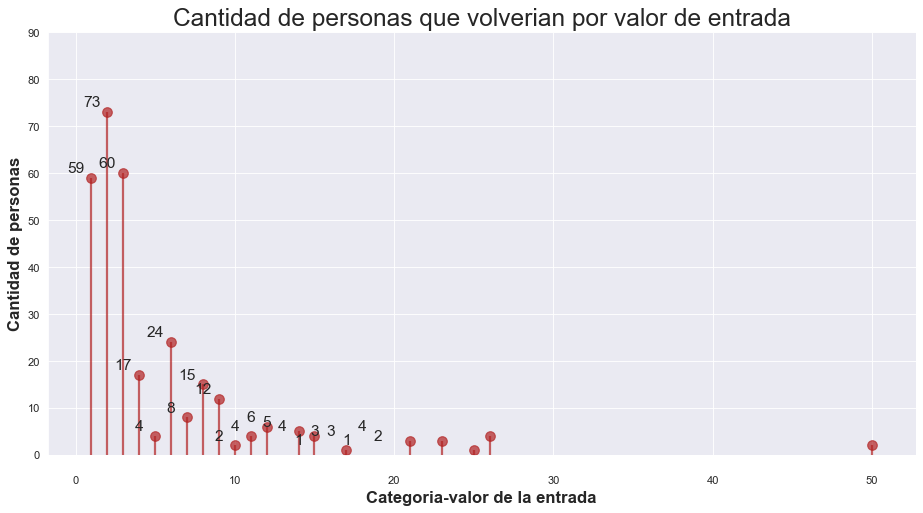

In [37]:
import pylab as pl
#pl.rcParams['xtick.major.pad']='8'
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)
ax.vlines(x=df_precio_ticket_vs_target.precio_ticket, ymin=0, ymax=df_precio_ticket_vs_target.volverian , color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_precio_ticket_vs_target.precio_ticket, y=df_precio_ticket_vs_target.volverian, s=75, color='firebrick', alpha=0.7)
ax.set_title('Cantidad de personas que volverian por valor de entrada', fontdict={'size':22})
ax.set_ylabel('Cantidad de personas', fontweight = 'semibold', fontsize = 15)
ax.set_xlabel('Categoria-valor de la entrada',fontweight = 'semibold', fontsize = 15)

ax.tick_params(axis='x', which='major', pad=15)
ax.set_ylim(0, 90)

# Annotate
for row in df_precio_ticket_vs_target.itertuples():
    ax.text(row.Index, row.volverian+.5, s=round(row.volverian, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

El grafico muestra que los compradores de las entradas mas baratas son aquellos con mayor disposicion a volver a algun cine de FiuMark a ver Frozen 3, en especial, los que adquirieron las entradas de las 3 categorias mas baratas. Se puede ver un decrecimiento de la forma:

\begin{equation*}
\frac{1}{k_1*x}
\end{equation*}
con x correspondiente al valor de la entrada y \begin{equation*} k_1>0 \end{equation*} 

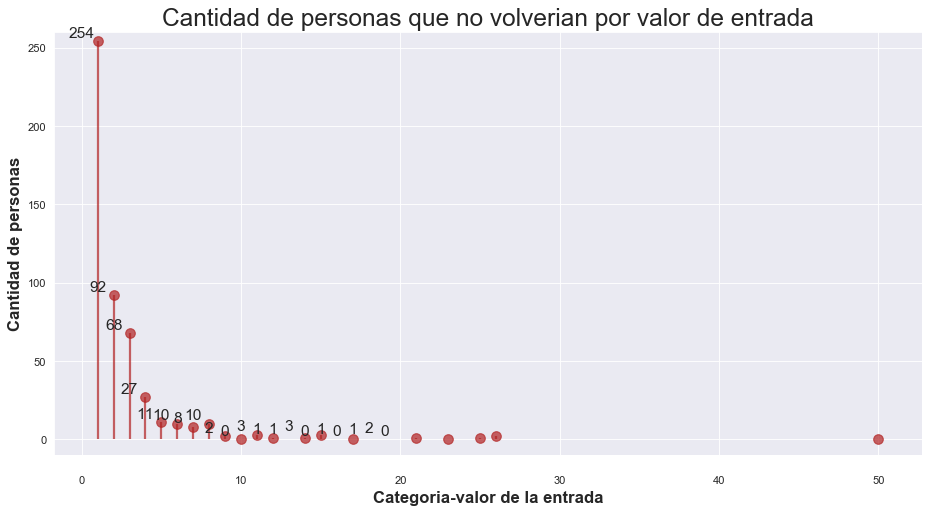

In [38]:
import pylab as pl
# Draw plot
#pl.rcParams['xtick.major.pad']='8'
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)
ax.vlines(x=df_precio_ticket_vs_target.precio_ticket, ymin=0, ymax=df_precio_ticket_vs_target.no_volverian , color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df_precio_ticket_vs_target.precio_ticket, y=df_precio_ticket_vs_target.no_volverian, s=75, color='firebrick', alpha=0.7)
ax.set_title('Cantidad de personas que no volverian por valor de entrada', fontdict={'size':22})
ax.set_ylabel('Cantidad de personas', fontweight = 'semibold', fontsize = 15)
ax.set_xlabel('Categoria-valor de la entrada',fontweight = 'semibold', fontsize = 15)

ax.tick_params(axis='x', which='major', pad=15)
ax.set_ylim(-10, 260)

# Annotate
for row in df_precio_ticket_vs_target.itertuples():
    ax.text(row.Index, row.no_volverian+.5, s=round(row.no_volverian, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

En este grafico, resulta interesante que aquellos que compraron la entrada mas barata son los menos dispuestos a volver a algun cine de FiuMark a ver Frozen 3. La diferencia con respecto al segundo grupo de menor disposicion a retornar es del 276%, lo cual resulta abismal. Una posible explicacion es que las personas que adquirieron dicha entrada lo hicieron a traves de alguna promocion o descuento ocasional, es decir, no son habitues de los cines de FiuMark, por lo que volver no es posible. El decrecimiento en este caso toma la forma:

\begin{equation*}
\frac{1}{k_2*x}
\end{equation*}
con x correspondiente al valor de la entrada y \begin{equation*} k_2>0 \end{equation*} 

Notamos, ademas, que la tasa de caida en la intencion de reincidencia es mucho mayor que en el caso de los que si volverian por el valor de la entrada, es decir \begin{equation*} k_2>k_1 \end{equation*} 
Lo que es esencial a este grafico es que ignorando las primeras categorias del valor de las entradas, en el resto de los casos no puede tomarse como categorias robustas a las de valores altos para discrimianr entre aquellos que asistirian a la funcion de Frozen 4 en alguna de las salad e FiuMark considerando. En conclusion, solo podemos separar entre aquellos que asistirian y los que no considerando las primeras categorias que son las que acumulan mayor cantidad de datos.


**SEGMENTO: COLUMNA EDAD**

In [44]:
df_edad_vs_target = df_features_target[['edad', 'volveria']]
df_edad_vs_target_not_null = df_edad_vs_target.dropna()
df_edad_vs_target_not_null.head()

,edad,volveria
0,73.5,0
1,35.0,0
4,4.0,1
7,32.0,0
8,41.0,1


In [45]:
df_edad_vs_target_volverian = df_edad_vs_target_not_null[df_edad_vs_target_not_null['volveria']==1]
df_edad_vs_target_volverian.head()

,edad,volveria
4,4.0,1
8,41.0,1
9,59.0,1
13,45.0,1
14,29.0,1


In [46]:
df_edad_vs_target_no_volverian = df_edad_vs_target_not_null[df_edad_vs_target_not_null['volveria']==0]
df_edad_vs_target_no_volverian.head()

,edad,volveria
0,73.5,0
1,35.0,0
7,32.0,0
10,43.5,0
11,27.0,0


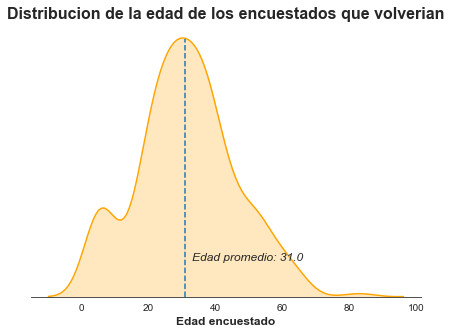

In [47]:
sns.set_style('white')
plt.figure(figsize = (7,5))
sns.distplot(df_edad_vs_target_volverian.edad, color = 'orange', kde_kws = {'shade':True}, hist = False)
plt.axvline(df_edad_vs_target_volverian.edad.median(), ymax = 0.95, linestyle = '--')
sns.despine(left = True)
plt.yticks([])
plt.text(df_edad_vs_target_volverian.edad.median() + 2, 0.004, "Edad promedio: " + str(df_edad_vs_target_volverian.edad.median()), 
         style = 'italic', fontsize = 12)
plt.xlabel("Edad encuestado", fontsize = 12, fontweight = 'semibold')
plt.title('Distribucion de la edad de los encuestados que volverian', fontsize = 16, fontweight = 'semibold')
plt.show()

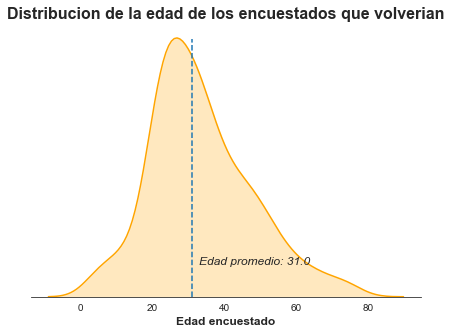

In [48]:
sns.set_style('white')
plt.figure(figsize = (7,5))
sns.distplot(df_edad_vs_target_no_volverian.edad, color = 'orange', kde_kws = {'shade':True}, hist = False)
plt.axvline(df_edad_vs_target_no_volverian.edad.median(), ymax = 0.95, linestyle = '--')
sns.despine(left = True)
plt.yticks([])
plt.text(df_edad_vs_target_no_volverian.edad.median() + 2, 0.004, "Edad promedio: " + str(df_edad_vs_target_no_volverian.edad.median()), 
         style = 'italic', fontsize = 12)
plt.xlabel("Edad encuestado", fontsize = 12, fontweight = 'semibold')
plt.title('Distribucion de la edad de los encuestados que volverian', fontsize = 16, fontweight = 'semibold')
plt.show()